逻辑回归  做到的回答 ！！是或者否！！  用到的是sigmoid函数
x为负无穷到正无穷  但y的值为(0,1) 所以可以让任何的x映射成y的一个概率值
从而做出判断

对于分类问题  使用平方差刻画损失是不合理的
因为是要输出的是概率值  所以应该用  “”交叉熵“”
交叉熵刻画的是 实际输出（概率）与期望输出（概率）的距离
也就是交叉熵的值越小，两个概率分布就越近。
交叉熵刻画的是  两个概率分布之间的关系
概率分布P为期望输出   概率分布Q为实际输出   则：H（P,Q）为交叉熵

keras中   使用 binary_crossentropy 来计算“二元”交叉熵
 softmax函数为解决多分类问题   （分量样本之和为1）
 例：北京 50% 上海30% 广州20%
keras中   使用 categorical_crossentropy 和 spare_categorical_crossentropy
          来计算softmax交叉熵

In [1]:
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
data=pd.read_csv('./train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()  #一共多少行  详细信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
y=data.Survived

In [6]:
x=data[[ 'Pclass','Sex', 'Age', 'SibSp',
       'Parch',  'Fare', 'Embarked']]    #双中括号取值

In [7]:
x.Embarked.unique()   #为x中的embarked （embarked的意思为代表登船的城市  有 C S Q三个
#nan为空缺的数据

array(['S', 'C', 'Q', nan], dtype=object)

独热编码

In [8]:
x['Embarked_S']=(x.Embarked=='S').astype('int')

D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
x['Embarked_C']=(x.Embarked=='C').astype('int')
x['Embarked_Q']=(x.Embarked=='Q').astype('int')

D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
x    #新增加了三列    若是S  则一列变成 1 0 0 依次类推

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,3,male,22.0,1,0,7.2500,S,1,0,0
1,1,female,38.0,1,0,71.2833,C,0,1,0
2,3,female,26.0,0,0,7.9250,S,1,0,0
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,3,male,35.0,0,0,8.0500,S,1,0,0
5,3,male,NaN,0,0,8.4583,Q,0,0,1
6,1,male,54.0,0,0,51.8625,S,1,0,0
7,3,male,2.0,3,1,21.0750,S,1,0,0
8,3,female,27.0,0,2,11.1333,S,1,0,0
9,2,female,14.0,1,0,30.0708,C,0,1,0


In [11]:
del x['Embarked']  #删掉Embarked那一列

In [12]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,male,22.0,1,0,7.2500,1,0,0
1,1,female,38.0,1,0,71.2833,0,1,0
2,3,female,26.0,0,0,7.9250,1,0,0
3,1,female,35.0,1,0,53.1000,1,0,0
4,3,male,35.0,0,0,8.0500,1,0,0
5,3,male,NaN,0,0,8.4583,0,0,1
6,1,male,54.0,0,0,51.8625,1,0,0
7,3,male,2.0,3,1,21.0750,1,0,0
8,3,female,27.0,0,2,11.1333,1,0,0
9,2,female,14.0,1,0,30.0708,0,1,0


In [13]:
x['Sex']=(x.Sex=='male').astype('int')  #转化为int类型 才能进行数值的计算 
#x1，2……要为数值才能计算       x['sex']为将sex这一列进行替换

D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0
5,3,1,NaN,0,0,8.4583,0,0,1
6,1,1,54.0,0,0,51.8625,1,0,0
7,3,1,2.0,3,1,21.0750,1,0,0
8,3,0,27.0,0,2,11.1333,1,0,0
9,2,0,14.0,1,0,30.0708,0,1,0


In [15]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
 x.info()      #age中有没有的数据 Non值
              #所以给没有数据的使用一个年龄均值进行填充

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_S    891 non-null int32
Embarked_C    891 non-null int32
Embarked_Q    891 non-null int32
dtypes: float64(2), int32(4), int64(3)
memory usage: 48.8 KB


In [17]:
x['Age']=x.Age.fillna(x.Age.mean())

D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_S    891 non-null int32
Embarked_C    891 non-null int32
Embarked_Q    891 non-null int32
dtypes: float64(2), int32(4), int64(3)
memory usage: 48.8 KB


开始对 pclass进行独热编码化  因为对计算机而言  三等票为3 一等票为1 会给计算机一种
三等票等于三张一等票的感觉  如果带入到线性回归中 会使拟合度和准确率不高

In [19]:
x['p1']=(x.Pclass==1).astype('int')
x['p2']=(x.Pclass==2).astype('int')
x['p3']=(x.Pclass==3).astype('int')

D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\123\envs\wuhu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
del x['Pclass']

In [21]:
x

,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,p1,p2,p3
0,1,22.000000,1,0,7.2500,1,0,0,0,0,1
1,0,38.000000,1,0,71.2833,0,1,0,1,0,0
2,0,26.000000,0,0,7.9250,1,0,0,0,0,1
3,0,35.000000,1,0,53.1000,1,0,0,1,0,0
4,1,35.000000,0,0,8.0500,1,0,0,0,0,1
5,1,29.699118,0,0,8.4583,0,0,1,0,0,1
6,1,54.000000,0,0,51.8625,1,0,0,1,0,0
7,1,2.000000,3,1,21.0750,1,0,0,0,0,1
8,0,27.000000,0,2,11.1333,1,0,0,0,0,1
9,0,14.000000,1,0,30.0708,0,1,0,0,1,0


In [22]:
x.shape,y.shape

((891, 11), (891,))

In [23]:
model=keras.Sequential()

In [24]:
from keras import layers

In [25]:
model.add(layers.Dense(1, input_dim=11,activation='sigmoid'))    #x有11个变量
                                          #要 y_pred=w1*x1+……+b  则用activation='sigmoid'
                                        #可以让输出的为一个概率值     activation为激活

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
             metrics=['accuracy'])      #记录准确率 

In [28]:
history=model.fit(x,y,epochs=300)

Epoch 1/300
891/891 [==============================] - 0s 388us/step - loss: 3.9605 - acc: 0.3232
Epoch 2/300
891/891 [==============================] - 0s 27us/step - loss: 3.6586 - acc: 0.3266
Epoch 3/300
891/891 [==============================] - 0s 30us/step - loss: 3.3891 - acc: 0.3288
Epoch 4/300
891/891 [==============================] - 0s 29us/step - loss: 3.1523 - acc: 0.3401
Epoch 5/300
891/891 [==============================] - 0s 31us/step - loss: 2.9183 - acc: 0.3490
Epoch 6/300
891/891 [==============================] - 0s 29us/step - loss: 2.6737 - acc: 0.3648
Epoch 7/300
891/891 [==============================] - 0s 29us/step - loss: 2.4228 - acc: 0.3771
Epoch 8/300
891/891 [==============================] - 0s 31us/step - loss: 2.1507 - acc: 0.3827
Epoch 9/300
891/891 [==============================] - 0s 29us/step - loss: 1.8041 - acc: 0.4029
Epoch 10/300
891/891 [==============================] - 0s 30us/step - loss: 1.4520 - acc: 0.4287
Epoch 11/300
891/891 [======

891/891 [==============================] - 0s 28us/step - loss: 0.4532 - acc: 0.8204
Epoch 167/300
891/891 [==============================] - 0s 26us/step - loss: 0.4537 - acc: 0.8182
Epoch 168/300
891/891 [==============================] - 0s 28us/step - loss: 0.4533 - acc: 0.8103
Epoch 169/300
891/891 [==============================] - 0s 26us/step - loss: 0.4522 - acc: 0.8137
Epoch 170/300
891/891 [==============================] - 0s 30us/step - loss: 0.4534 - acc: 0.8148
Epoch 171/300
891/891 [==============================] - 0s 26us/step - loss: 0.4523 - acc: 0.8159
Epoch 172/300
891/891 [==============================] - 0s 27us/step - loss: 0.4521 - acc: 0.8114
Epoch 173/300
891/891 [==============================] - 0s 29us/step - loss: 0.4522 - acc: 0.8204
Epoch 174/300
891/891 [==============================] - 0s 27us/step - loss: 0.4516 - acc: 0.8126
Epoch 175/300
891/891 [==============================] - 0s 30us/step - loss: 0.4538 - acc: 0.8148
Epoch 176/300
891/891 [=

In [29]:
history.history.keys()    #history中保留的数据 

dict_keys(['loss', 'acc'])

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

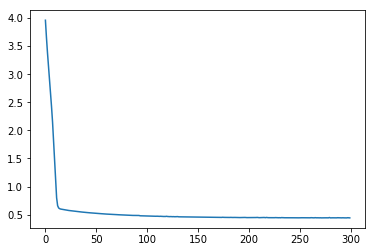

In [31]:
plt.plot(range(300),history.history.get('loss'))    #从第0个epochs开始训练  loss值的变化
                                        #可以看的出优化的速率和一些节点

In [32]:
history.history.get('loss')  #字典读取方法

[3.9605040635859257,
 3.6585580173432493,
 3.3891417800911885,
 3.1522779336280693,
 2.9182813666618768,
 2.673663563466099,
 2.4228024001073356,
 2.1507317316117378,
 1.8040632028237202,
 1.4520232638659836,
 1.0830458585260694,
 0.80038977538964029,
 0.6598229245037075,
 0.61967800007390927,
 0.60667633575488689,
 0.60014638481985705,
 0.59683834288925697,
 0.59308837412717497,
 0.58930603823677863,
 0.58644348617087039,
 0.58427235748363804,
 0.58177695517855732,
 0.57790104909376661,
 0.57475322498349357,
 0.57248023353040423,
 0.56999249283044562,
 0.5680953701738557,
 0.56507318262031714,
 0.56250769307985315,
 0.56064347482958488,
 0.55896423982851429,
 0.5579669429731422,
 0.55486219141352189,
 0.55216785412444813,
 0.55147888002170853,
 0.54853165303550322,
 0.54665569554675708,
 0.54522396645829596,
 0.54343301097953356,
 0.54222433260661851,
 0.53977323003221978,
 0.5379039097313929,
 0.53577227203131528,
 0.53549366038790192,
 0.53287144689313759,
 0.53162628378798527,
 0.5

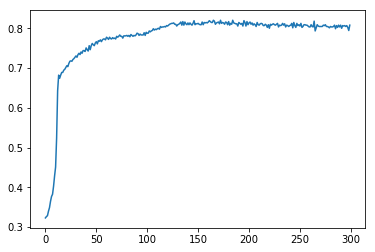

In [33]:
plt.plot(range(300),history.history.get('acc'))  #准确率的变化  是acc！ 要看history中写成什么样就用什么